# Visualize the LHC input values

Load modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Read in LHC matrix (inputdata)

In [4]:
inputdata = np.load(file="lhc_100.npy", allow_pickle=True)
inputdata.shape

(100, 6)

In [23]:
in_vars = ['medlynslope','dleaf','kmax','fff','dint','baseflow_scalar']
ndim = len(in_vars)

Visualize

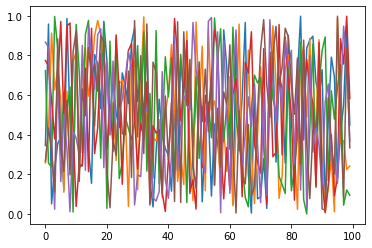

In [5]:
# each line is a parameter
plt.plot(inputdata);

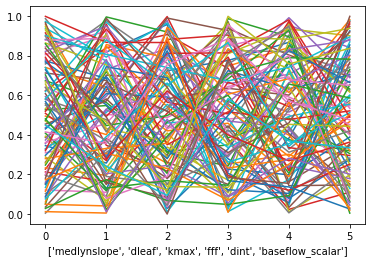

In [6]:
# each line is an ensemble member
plt.plot(np.transpose(inputdata))
plt.xlabel(in_vars);

PPE image only

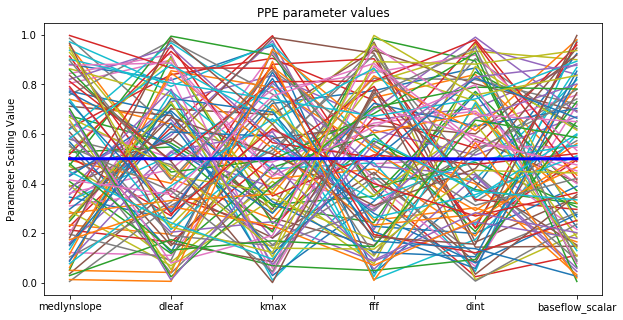

In [34]:
fig = plt.figure(figsize=(10, 5))
plt.plot(np.transpose(inputdata))
plt.plot(np.mean(np.transpose(inputdata), axis=1), linewidth=3, c='b', label="Average PPE")
#plt.xlabel(in_vars);
plt.ylabel("Parameter Scaling Value")
plt.title("PPE parameter values")
#plt.legend(loc='upper center')
#plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8))
plt.xticks(np.arange(6), labels=in_vars);
#fig.savefig("inputdata_LHC.pdf", bbox_inches='tight')
#fig.savefig("inputdata_LHC_withmean.pdf", bbox_inches='tight')

Plot the inflated ensemble

In [8]:
inputinflate = np.load(file="lhc_1000.npy", allow_pickle=True)

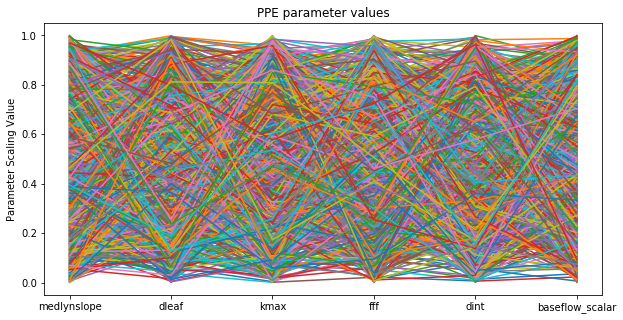

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.plot(np.transpose(inputinflate))
#plt.plot(np.mean(np.transpose(inputdata), axis=1), linewidth=3, c='b', label="Average PPE")
#plt.xlabel(in_vars);
plt.ylabel("Parameter Scaling Value")
plt.title("PPE parameter values")
#plt.legend(loc='upper center')
#plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8))
plt.xticks(np.arange(6), labels=in_vars);
#fig.savefig("inputdata_LHC_1000.pdf", bbox_inches='tight')

Distributions of input data

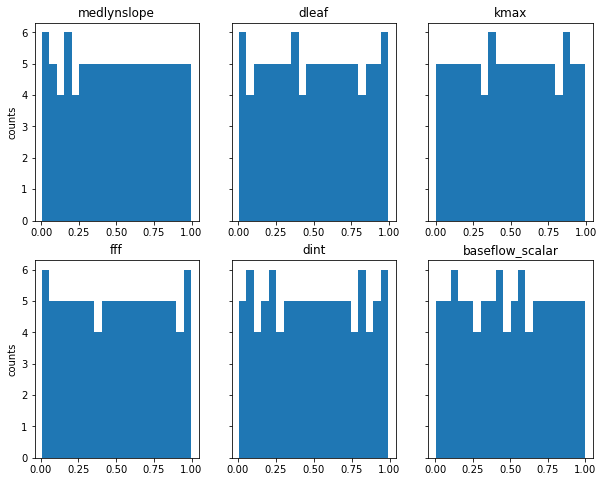

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey='row', figsize=(10, 8))
labels = in_vars
axes = axes.flatten()
for i in range(ndim):
    ax = axes[i]
    ax.hist(inputdata[:,i], bins=20)
    ax.set_title(labels[i])

axes[0].set_ylabel("counts")
axes[3].set_ylabel("counts");

#plt.savefig("inputdata_LHC_dists.pdf")

Compare with purely randomly generated input

In [16]:
# uniform samples between 0,1 with specified size
inputdata_rand = np.random.uniform(size=(100,6))
inputdata_rand.shape

(100, 6)

In [21]:
# sanity check
print('min=',inputdata_rand.min(), 'max=',inputdata_rand.max())

min= 0.0014975129145236021 max= 0.9995376868430084


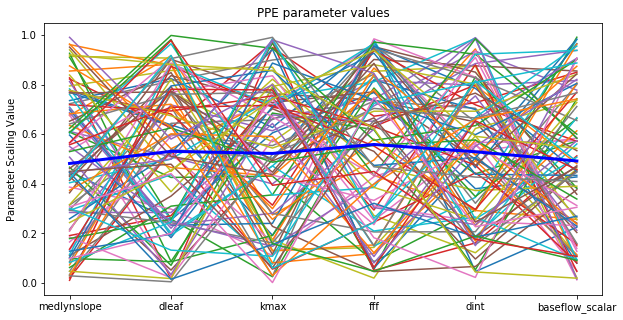

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.plot(np.transpose(inputdata_rand))
plt.plot(np.mean(np.transpose(inputdata_rand), axis=1), linewidth=3, c='b', label="Average PPE")
plt.ylabel("Parameter Scaling Value")
plt.title("PPE parameter values")
plt.xticks(np.arange(6), labels=in_vars);
#fig.savefig("inputdata_rand.pdf", bbox_inches='tight')

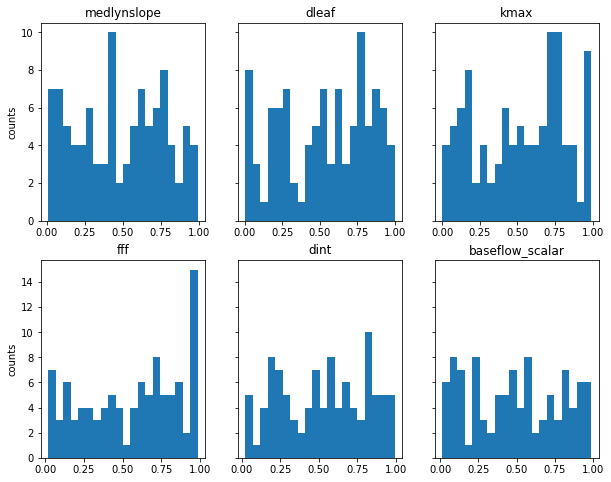

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey='row', figsize=(10, 8))
labels = in_vars
axes = axes.flatten()
for i in range(ndim):
    ax = axes[i]
    ax.hist(inputdata_rand[:,i], bins=20)
    ax.set_title(labels[i])

axes[0].set_ylabel("counts")
axes[3].set_ylabel("counts");

#plt.savefig("inputdata_rand_dists.pdf")